In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
cont_names = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]
cont_dict = {name: np.float64 for name in cont_names}

area_names = ["WArea_"+ str(i+1) for i in range(4)]
area_dict = {name: np.int64 for name in area_names}

soil_names = ['Soil_' + str(i+1) for i in range(40)]
soil_dict = {name: np.int64 for name in soil_names}

categ_names = area_names + soil_names

target = 'Cover_Type'
names = cont_names + categ_names #all columns except cover types
dtypes_dict = {**cont_dict, **area_dict, **soil_dict}

In [3]:
df = pd.read_csv("covtype.data", header = None, names = names + [target], dtype = dtypes_dict)

# Data Exploration

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head(20)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,WArea_1,WArea_2,WArea_3,WArea_4,Soil_1,Soil_2,Soil_3,Soil_4,Soil_5,Soil_6,Soil_7,Soil_8,Soil_9,Soil_10,Soil_11,Soil_12,Soil_13,Soil_14,Soil_15,Soil_16,Soil_17,Soil_18,Soil_19,Soil_20,Soil_21,Soil_22,Soil_23,Soil_24,Soil_25,Soil_26,Soil_27,Soil_28,Soil_29,Soil_30,Soil_31,Soil_32,Soil_33,Soil_34,Soil_35,Soil_36,Soil_37,Soil_38,Soil_39,Soil_40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
5,2579.0,132.0,6.0,300.0,-15.0,67.0,230.0,237.0,140.0,6031.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
6,2606.0,45.0,7.0,270.0,5.0,633.0,222.0,225.0,138.0,6256.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
7,2605.0,49.0,4.0,234.0,7.0,573.0,222.0,230.0,144.0,6228.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
8,2617.0,45.0,9.0,240.0,56.0,666.0,223.0,221.0,133.0,6244.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
9,2612.0,59.0,10.0,247.0,11.0,636.0,228.0,219.0,124.0,6230.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  WArea_1                             581012 non-null  int64  
 11  WArea_2                   

In the dataset there are columns:
<br>Elevation - Elevation in meters
<br>Aspect - Aspect in degrees azimuth
<br>Slope - Slope in degrees
<br>Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
<br>Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
<br>Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
<br>Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
<br>Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
<br>Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
<br>Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
<br>Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
<br>Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
<br>Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

Forest Cover type observations are taken from patches of forest in four wilderness areas:
1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

they are classified as one of seven cover types:
1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

Making sure that wilderness area columns and soil type columns consist only of binary values, we see that they do.

In [7]:
binaryCol = [column for column in df.columns if ("WArea_" in column) | ("Soil_" in column)]
pd.unique(df[binaryCol].values.ravel())

array([1, 0])

Describing numerical features

In [8]:
data_trees_quantitative = df.iloc[:,0:10]
data_trees_quantitative.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


Looking at the std which is Standard Deviation we see that the most spread data is: Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Fire_Points and Elevation, the least spread data is: Slope and Hillshades.

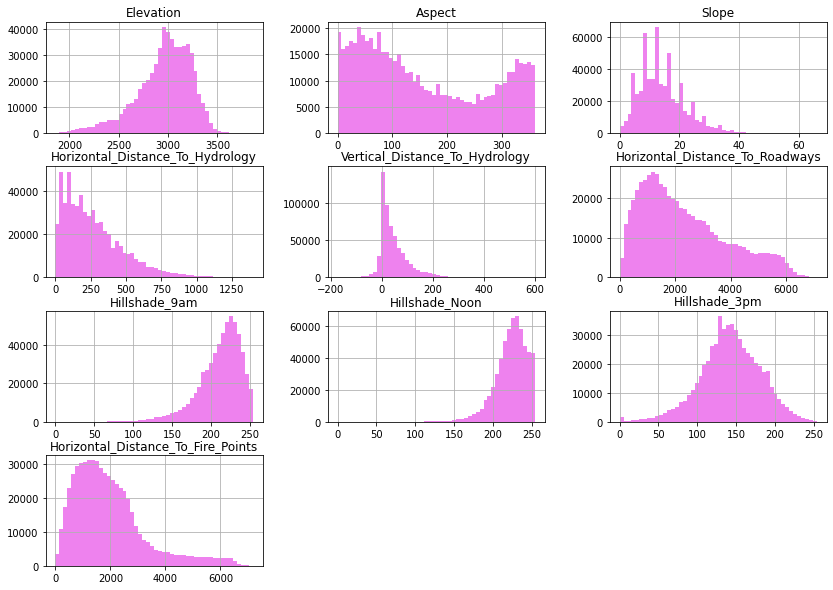

In [9]:
data_trees_quantitative.hist(figsize=(14,10),color = "violet", bins=50)
plt.show()

In [10]:
data_trees_categorical = df[categ_names]
data_trees_categorical.describe().T

,count,mean,std,min,25%,50%,75%,max
WArea_1,581012.0,0.448865,0.497379,0.0,0.0,0.0,1.0,1.0
WArea_2,581012.0,0.051434,0.220882,0.0,0.0,0.0,0.0,1.0
WArea_3,581012.0,0.436074,0.495897,0.0,0.0,0.0,1.0,1.0
WArea_4,581012.0,0.063627,0.244087,0.0,0.0,0.0,0.0,1.0
Soil_1,581012.0,0.005217,0.072039,0.0,0.0,0.0,0.0,1.0
Soil_2,581012.0,0.012952,0.113066,0.0,0.0,0.0,0.0,1.0
Soil_3,581012.0,0.008301,0.090731,0.0,0.0,0.0,0.0,1.0
Soil_4,581012.0,0.021335,0.144499,0.0,0.0,0.0,0.0,1.0
Soil_5,581012.0,0.002749,0.052356,0.0,0.0,0.0,0.0,1.0
Soil_6,581012.0,0.011316,0.105775,0.0,0.0,0.0,0.0,1.0


Cateogorical values have a value of 0 or 1. The higher the mean the more present is this variable in the dataset. So that means the WArea_3 and WArea_1 are the most present in the data set. 

In [11]:
data_trees_quantitative.isna().sum() #=> none of the values are missing

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
dtype: int64

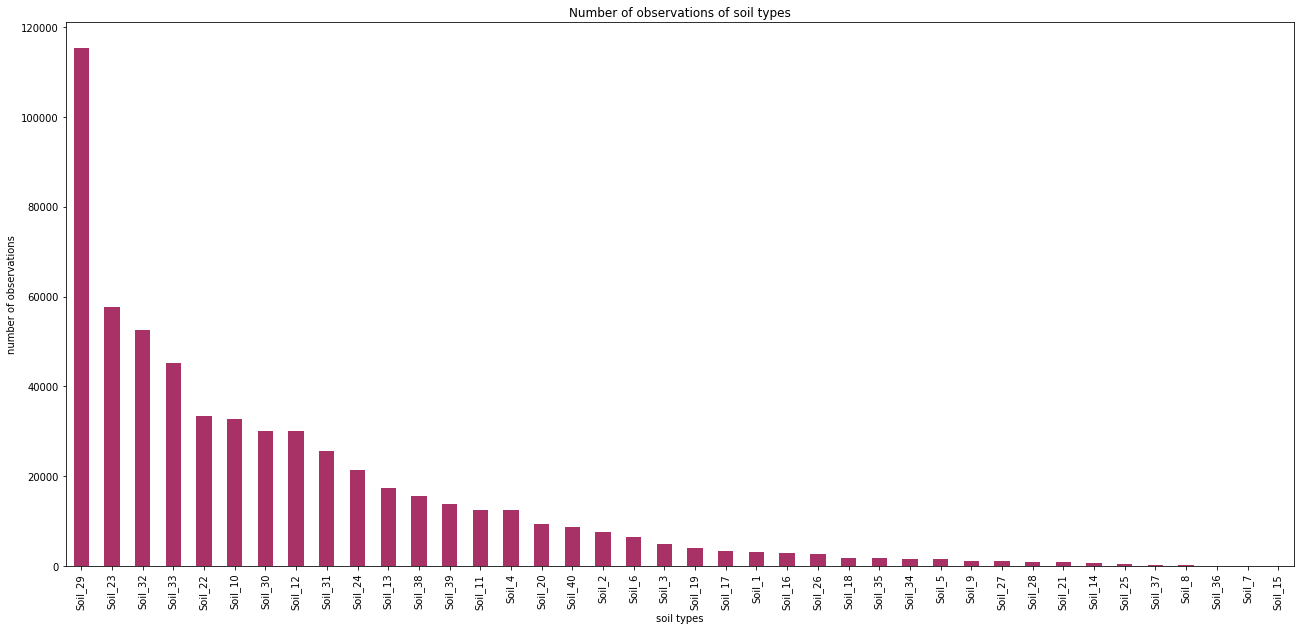

In [12]:
SoilData = df.iloc[:,14:54]
sum_soil_data = pd.Series(SoilData.sum())
sum_soil_data.sort_values(ascending=False, inplace = True)
sum_soil_data.plot(kind="bar", figsize=(22,10), color = '#a83266')
plt.title("Number of observations of soil types")
plt.xlabel("soil types")
plt.ylabel("number of observations")
plt.show()

Cover type distribution

In [13]:
df.iloc[:,54].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

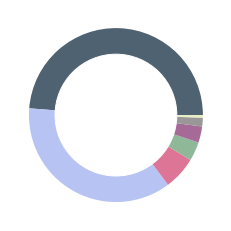

,percentage
2,48.759922
1,36.460521
3,6.153746
7,3.530048
6,2.989095
5,1.633873
4,0.472796


In [14]:
my_circle = plt.Circle((0, 0), 0.7, color='white')
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#a66a99', '#9a9799', '#e8eec3']
plt.pie(df.Cover_Type.value_counts(), colors = colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
series = 100*df['Cover_Type'].value_counts()/df['Cover_Type'].count()
pd.DataFrame({'percentage': series})

Skewness for normal distribution should be equal to zero, negative values indicate data is skewed left, positive values indicate data is skewed right. The skewness values can be interpreted in the following manner: Highly skewed distribution: If the skewness value is less than −1 or greater than +1, Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1, Approximately symmetric distribution: If the skewness value is between −½ and +½.
<br><br>
Higly skewed distribution occurs in Distance to Hydrology and Hillshades and Distance to fire points.
<br><br>
Skewness measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails. Which means that kurtosis refers to the degree of presence of outliers in the distribution. This means the biggest number of outliers would be found in Vertical_Distance_To_Hydrology and Hillshade_Noon.
<br><br>
An outlier is a data point that differs significantly from other observations, it is too big or to small comparing to other data. It may be caused by varaiblity in the measurement or by experimental error. Sometimes they can interfere with they analysis we are trying to carry out.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Elevation'),
  Text(1, 0, 'Aspect'),
  Text(2, 0, 'Slope'),
  Text(3, 0, 'Horizontal_Distance_To_Hydrology'),
  Text(4, 0, 'Vertical_Distance_To_Hydrology'),
  Text(5, 0, 'Horizontal_Distance_To_Roadways'),
  Text(6, 0, 'Hillshade_9am'),
  Text(7, 0, 'Hillshade_Noon'),
  Text(8, 0, 'Hillshade_3pm'),
  Text(9, 0, 'Horizontal_Distance_To_Fire_Points')])

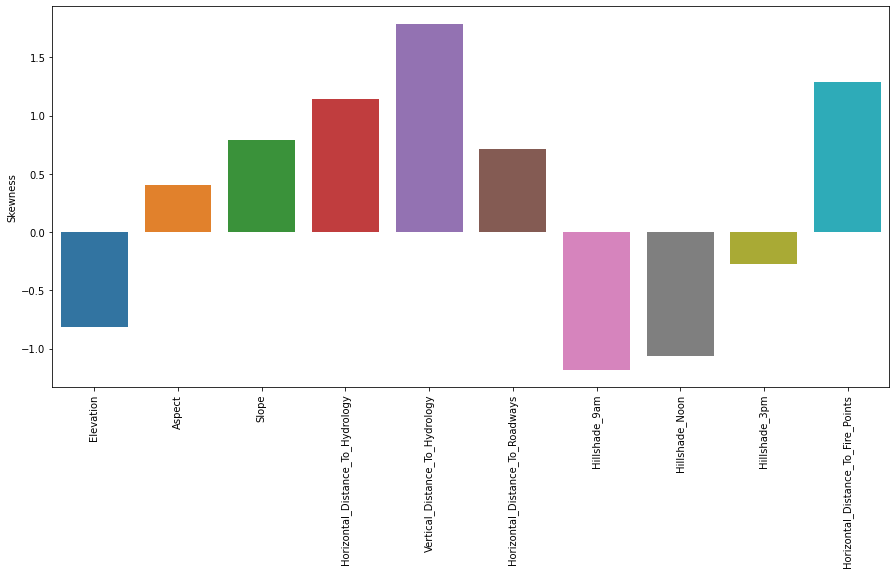

In [15]:
skew=data_trees_quantitative.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Elevation'),
  Text(1, 0, 'Aspect'),
  Text(2, 0, 'Slope'),
  Text(3, 0, 'Horizontal_Distance_To_Hydrology'),
  Text(4, 0, 'Vertical_Distance_To_Hydrology'),
  Text(5, 0, 'Horizontal_Distance_To_Roadways'),
  Text(6, 0, 'Hillshade_9am'),
  Text(7, 0, 'Hillshade_Noon'),
  Text(8, 0, 'Hillshade_3pm'),
  Text(9, 0, 'Horizontal_Distance_To_Fire_Points')])

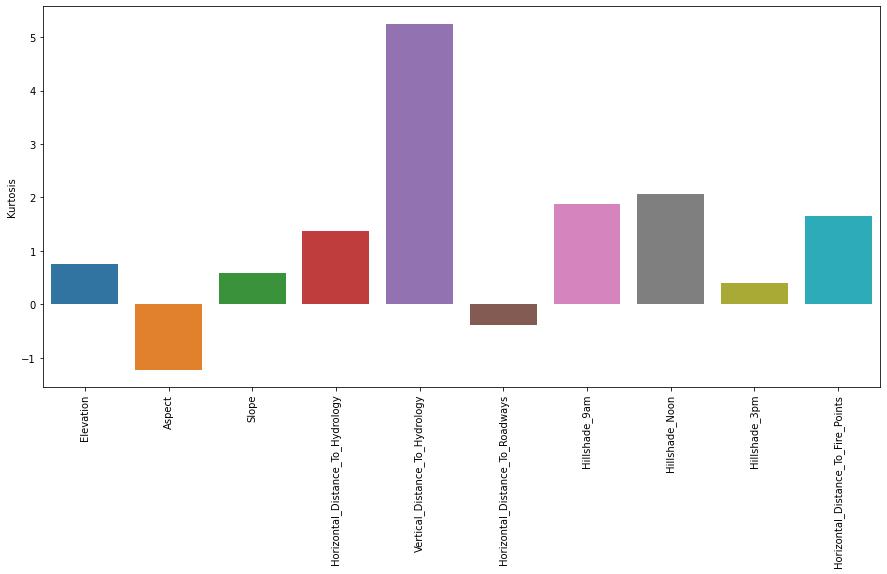

In [16]:
kurt = data_trees_quantitative.kurt()
kurt_dataframe = pd.DataFrame(kurt, index = None, columns=['Kurtosis'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Kurtosis',data=kurt_dataframe)
plt.xticks(rotation=90)

Correlation matrix displayed with using heat map allows us to efficiently grasp which variables are strongly correlated with each other. -1 indicates a perfectly negative linear correlation between two variables 0 indicates no linear correlation between two variables 1 indicates a perfeclty positive linear correlation between two variables The further away the correlation coefficient is from zero, the stronger the relationship between the two variables.

In [17]:
CorrMatrix = data_trees_quantitative.corr()
CorrMatrix.T

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000


Text(0.5, 1.05, 'Correlation of All Features')

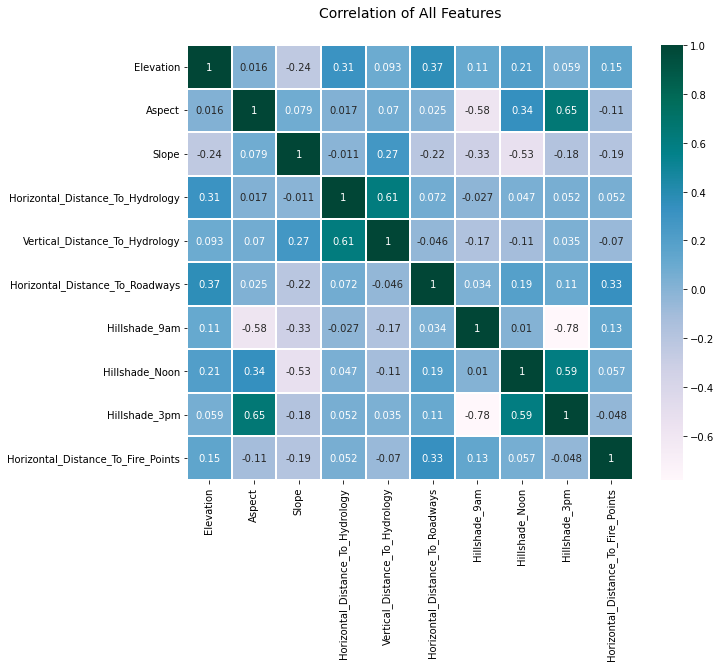

In [18]:
colormap = plt.cm.PuBuGn
plt.figure(figsize=(10,8))
sns.heatmap(CorrMatrix, linewidths=0.1,vmax=1.0, square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Correlation of All Features', y=1.05, size=14)

We will get out the variables that have the strongest correlation. We look for those whose correlation coefficent is greater than 0.5.

In [19]:
X_cont = df[cont_names]
size = len(cont_names)
CorrelationList = []
for i in range(size):
    for j in range(i+1, size):
        el = CorrMatrix.iloc[i,j]
        if abs(el) > 0.5:
            CorrelationList.append((el, i, j))

CorrelationList.sort(key=(lambda x: abs(x[0])), reverse=True)
[(el, cont_names[i], cont_names[j]) for el, i, j in CorrelationList]

[(-0.7802959522807976, 'Hillshade_9am', 'Hillshade_3pm'),
 (0.6469439534956679, 'Aspect', 'Hillshade_3pm'),
 (0.6062355059591138,
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology'),
 (0.5942736480372658, 'Hillshade_Noon', 'Hillshade_3pm'),
 (-0.5792729109405359, 'Aspect', 'Hillshade_9am'),
 (-0.5269106396657895, 'Slope', 'Hillshade_Noon')]

In [20]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

/tmp/ipykernel_12216/2284580335.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


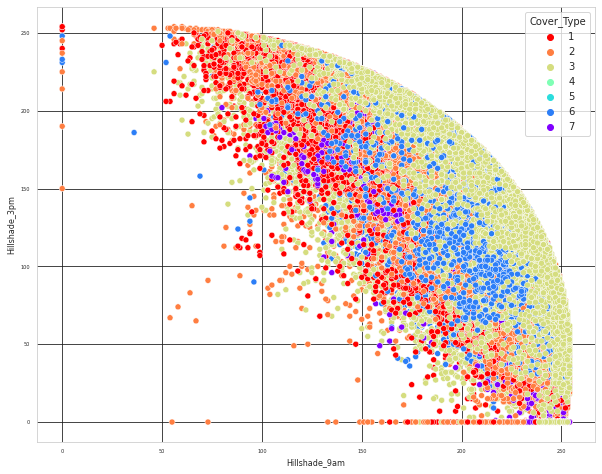

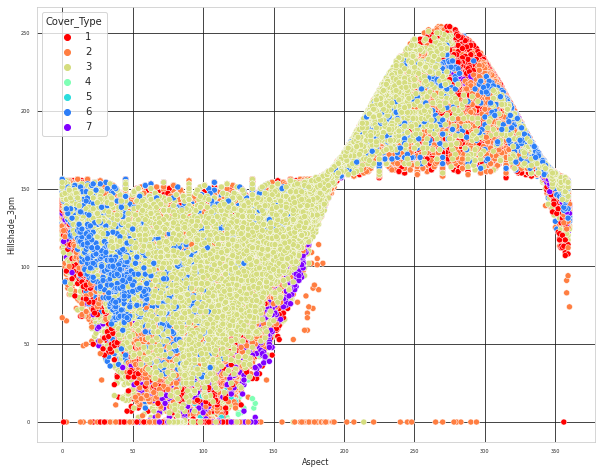

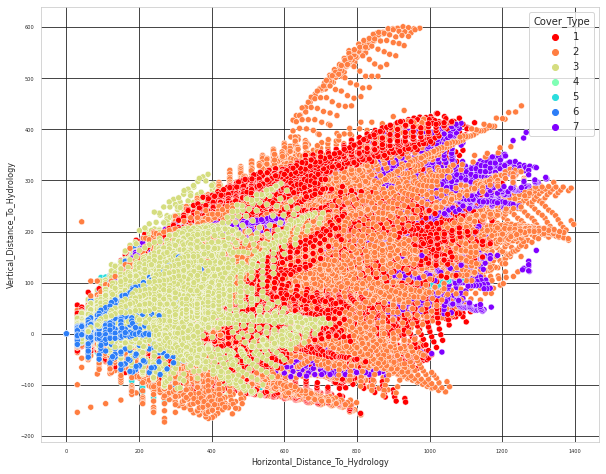

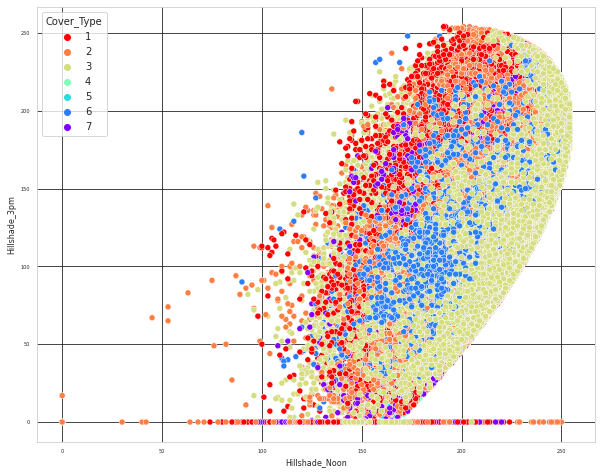

/home/zezula/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


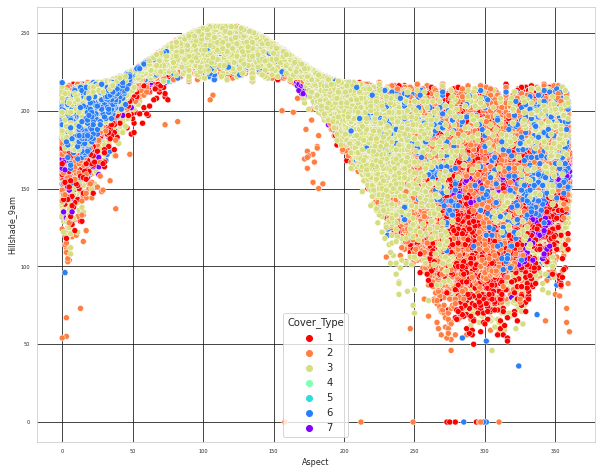

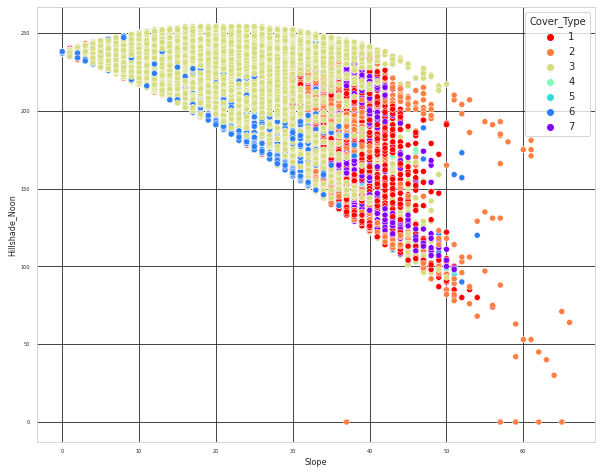

In [21]:
sns.set_style("whitegrid", {'grid.color': '.1'})

# paired features with positive correlation
list_data_corr = [['Hillshade_9am', 'Hillshade_3pm'],
                  ['Aspect', 'Hillshade_3pm'],
                  ['Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology'],
                  ['Hillshade_Noon', 'Hillshade_3pm'], ['Aspect', 'Hillshade_9am'], ['Slope', 'Hillshade_Noon']]

# loop through outer list
# take 2 features from inner list
for i,j in list_data_corr:
    plt.subplots(figsize=(10,8))
    sns.scatterplot(data=df, x=i, y=j, hue="Cover_Type", legend='full', palette='rainbow_r')
    plt.xticks(size=5)
    plt.yticks(size=5)
    plt.xlabel(i, size=8)
    plt.ylabel(j, size=8)
    
    plt.show()

# Creating & comparing models, results visualization

In [22]:
x = df[names]
y = df[target]

x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)
y_test.value_counts()

2    56769
1    42344
3     7041
7     4174
6     3470
5     1869
4      536
Name: Cover_Type, dtype: int64

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [24]:
model = LogisticRegression(class_weight = 'balanced' , solver='liblinear')
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

metrics.confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           1      0.698     0.664     0.680     42344
           2      0.758     0.688     0.721     56769
           3      0.628     0.681     0.653      7041
           4      0.353     0.685     0.466       536
           5      0.153     0.434     0.226      1869
           6      0.332     0.468     0.388      3470
           7      0.559     0.747     0.640      4174

    accuracy                          0.670    116203
   macro avg      0.497     0.624     0.539    116203
weighted avg      0.697     0.670     0.680    116203



In [25]:
k=KNeighborsClassifier()
d=DecisionTreeClassifier()
rf=RandomForestClassifier()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
algos=[k,d,rf]
algos_name=['KNeigbors','DecisionTree','RandomForest']
    
accuracy = []
precision = []
recall = []
f1 = []
   
result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)

for i in algos:
        
    predict=i.fit(x_train,y_train).predict(x_test)
        
    accuracy.append(accuracy_score(y_test,predict))
    precision.append(precision_score(y_test,predict,average='micro'))
    recall.append(recall_score(y_test,predict,average='micro'))
    f1.append(f1_score(y_test,predict,average='micro'))
        
    print(metrics.classification_report(y_test, predict, digits=3))
        

    
    
result.AccuracyScore=accuracy
result.PrecisionScore=precision
result.RecallScore=recall
result.f1_Score=f1

              precision    recall  f1-score   support

           1      0.970     0.968     0.969     42557
           2      0.972     0.975     0.974     56500
           3      0.960     0.971     0.965      7121
           4      0.924     0.791     0.852       526
           5      0.917     0.897     0.907      1995
           6      0.944     0.933     0.938      3489
           7      0.978     0.967     0.973      4015

    accuracy                          0.969    116203
   macro avg      0.952     0.929     0.940    116203
weighted avg      0.969     0.969     0.969    116203

              precision    recall  f1-score   support

           1      0.939     0.937     0.938     42557
           2      0.948     0.948     0.948     56500
           3      0.929     0.933     0.931      7121
           4      0.849     0.821     0.835       526
           5      0.836     0.829     0.832      1995
           6      0.882     0.887     0.884      3489
           7      0.943 

**Undersampling**

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
min_class_size = np.min(df[target].value_counts().values)
print("Smallest class size: ", min_class_size)

Smallest class size:  2747


In [28]:
undersampled_data = df.copy()
class_subsets = [undersampled_data.query("Cover_Type == " + str(i)) for i in range(7)]

for i in range(7):
    subset_size = min(min_class_size, len(class_subsets[i]))
    class_subsets[i] = class_subsets[i].sample(subset_size, replace=False, random_state=123)

undersampled_data = pd.concat(class_subsets, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)

In [29]:
undersampled_data[target].value_counts()

6    2747
1    2747
2    2747
3    2747
4    2747
5    2747
Name: Cover_Type, dtype: int64

In [30]:
def split_and_scale(dataset):
    dataset = dataset.copy()

    y = dataset[target].copy()
    X = dataset[names].copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [31]:
X_train, X_test, y_train, y_test = split_and_scale(undersampled_data)

In [32]:
def evaluate(model, class_balance, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='RdPu')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report\n\n", clr)

In [33]:
model_unders_lr = LogisticRegression()
model_unders_lr.fit(X_train, y_train)

/home/zezula/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy (Undersampling): 69.52%


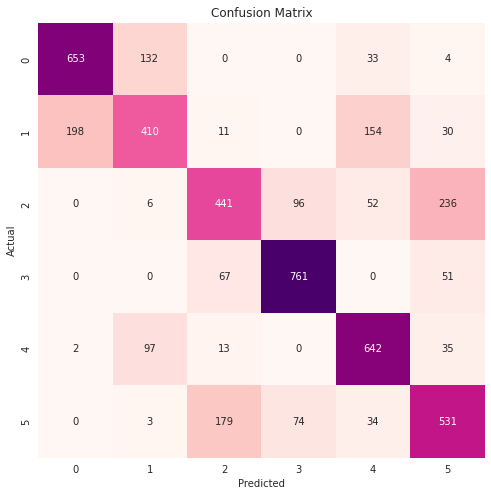

Classification Report

               precision    recall  f1-score   support

           1       0.77      0.79      0.78       822
           2       0.63      0.51      0.57       803
           3       0.62      0.53      0.57       831
           4       0.82      0.87      0.84       879
           5       0.70      0.81      0.75       789
           6       0.60      0.65      0.62       821

    accuracy                           0.70      4945
   macro avg       0.69      0.69      0.69      4945
weighted avg       0.69      0.70      0.69      4945



In [34]:
evaluate(model_unders_lr, "Undersampling", X_test, y_test)

In [35]:
model_unders_knnei = KNeighborsClassifier()
model_unders_knnei.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy (Undersampling): 77.67%


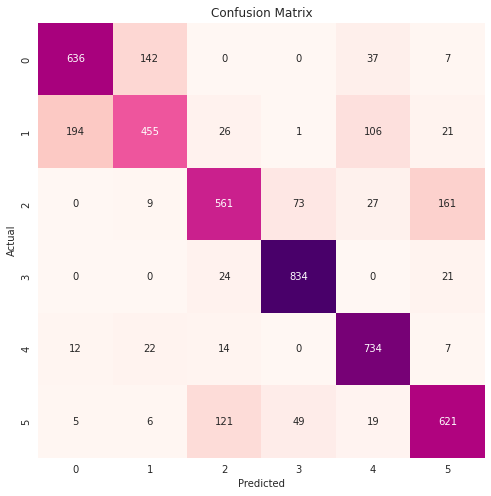

Classification Report

               precision    recall  f1-score   support

           1       0.75      0.77      0.76       822
           2       0.72      0.57      0.63       803
           3       0.75      0.68      0.71       831
           4       0.87      0.95      0.91       879
           5       0.80      0.93      0.86       789
           6       0.74      0.76      0.75       821

    accuracy                           0.78      4945
   macro avg       0.77      0.78      0.77      4945
weighted avg       0.77      0.78      0.77      4945



In [36]:
evaluate(model_unders_knnei, "Undersampling", X_test, y_test)

In [37]:
model_unders_dtree = DecisionTreeClassifier()
model_unders_dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy (Undersampling): 79.33%


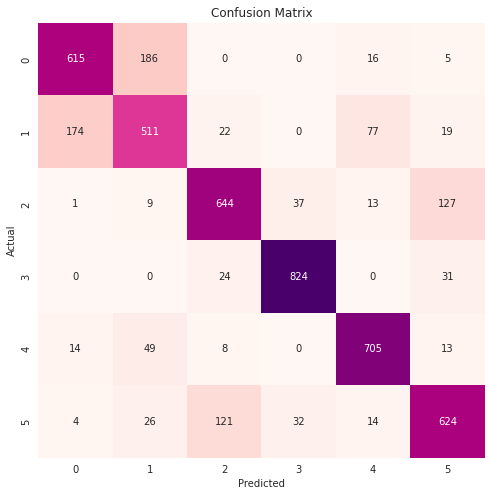

Classification Report

               precision    recall  f1-score   support

           1       0.76      0.75      0.75       822
           2       0.65      0.64      0.65       803
           3       0.79      0.77      0.78       831
           4       0.92      0.94      0.93       879
           5       0.85      0.89      0.87       789
           6       0.76      0.76      0.76       821

    accuracy                           0.79      4945
   macro avg       0.79      0.79      0.79      4945
weighted avg       0.79      0.79      0.79      4945



In [38]:
evaluate(model_unders_dtree, "Undersampling", X_test, y_test)

In [39]:
model_unders_rf = RandomForestClassifier()
model_unders_rf.fit(X_train, y_train)

RandomForestClassifier()

Accuracy (Undersampling): 85.26%


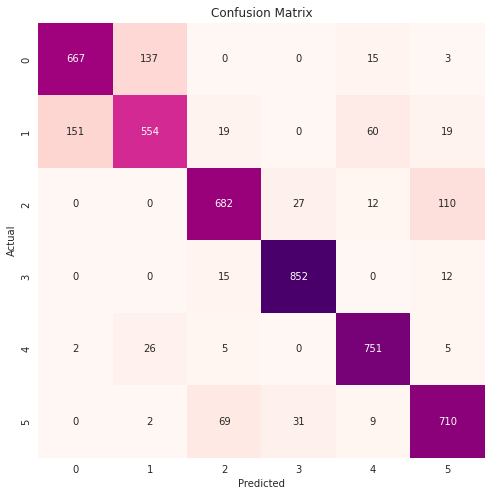

Classification Report

               precision    recall  f1-score   support

           1       0.81      0.81      0.81       822
           2       0.77      0.69      0.73       803
           3       0.86      0.82      0.84       831
           4       0.94      0.97      0.95       879
           5       0.89      0.95      0.92       789
           6       0.83      0.86      0.85       821

    accuracy                           0.85      4945
   macro avg       0.85      0.85      0.85      4945
weighted avg       0.85      0.85      0.85      4945



In [40]:
evaluate(model_unders_rf, "Undersampling", X_test, y_test)

**Oversampling**

In [41]:
max_class_size = np.max(df[target].value_counts().values)
print("Largest class size: ", max_class_size)

Largest class size:  283301


In [42]:
oversampled_data = df.copy()
class_subsets = [oversampled_data.query("Cover_Type == " + str(i)) for i in range(7)]

for i in range(7):
    subset_size = max_class_size if len(class_subsets[i]) > 0 else 0
    if subset_size > 0:
        class_subsets[i] = class_subsets[i].sample(subset_size, replace=True, random_state=123)

oversampled_data = pd.concat(class_subsets, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)

In [43]:
oversampled_data[target].value_counts()

2    283301
1    283301
3    283301
6    283301
4    283301
5    283301
Name: Cover_Type, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = split_and_scale(oversampled_data)

In [45]:
model_overs_lr = LogisticRegression()
model_overs_lr.fit(X_train, y_train)

/home/zezula/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy (Oversampling): 69.66%


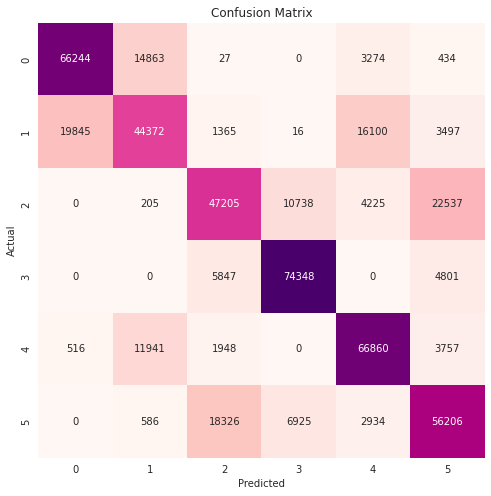

Classification Report

               precision    recall  f1-score   support

           1       0.76      0.78      0.77     84842
           2       0.62      0.52      0.56     85195
           3       0.63      0.56      0.59     84910
           4       0.81      0.87      0.84     84996
           5       0.72      0.79      0.75     85022
           6       0.62      0.66      0.64     84977

    accuracy                           0.70    509942
   macro avg       0.69      0.70      0.69    509942
weighted avg       0.69      0.70      0.69    509942



In [46]:
evaluate(model_overs_lr, "Oversampling", X_test, y_test)

In [47]:
model_overs_knnei = KNeighborsClassifier()
model_overs_knnei.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy (Oversampling): 98.02%


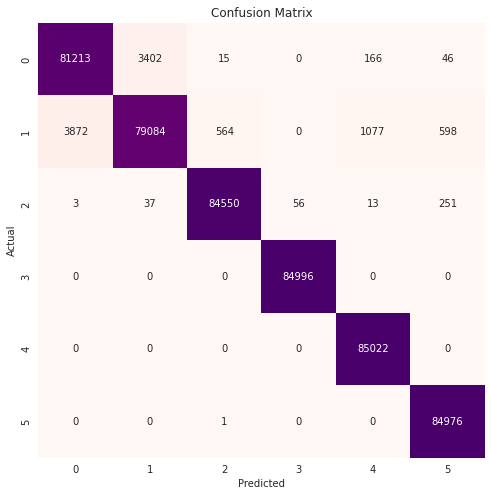

Classification Report

               precision    recall  f1-score   support

           1       0.95      0.96      0.96     84842
           2       0.96      0.93      0.94     85195
           3       0.99      1.00      0.99     84910
           4       1.00      1.00      1.00     84996
           5       0.99      1.00      0.99     85022
           6       0.99      1.00      0.99     84977

    accuracy                           0.98    509942
   macro avg       0.98      0.98      0.98    509942
weighted avg       0.98      0.98      0.98    509942



In [48]:
evaluate(model_overs_knnei, "Oversampling", X_test, y_test)

In [49]:
model_overs_dtree = DecisionTreeClassifier()
model_overs_dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy (Oversampling): 98.99%


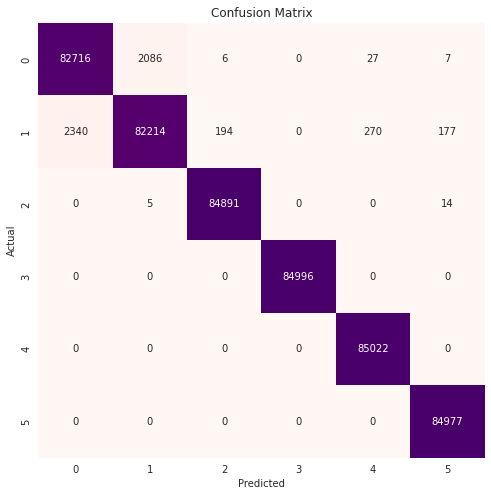

Classification Report

               precision    recall  f1-score   support

           1       0.97      0.97      0.97     84842
           2       0.98      0.97      0.97     85195
           3       1.00      1.00      1.00     84910
           4       1.00      1.00      1.00     84996
           5       1.00      1.00      1.00     85022
           6       1.00      1.00      1.00     84977

    accuracy                           0.99    509942
   macro avg       0.99      0.99      0.99    509942
weighted avg       0.99      0.99      0.99    509942



In [50]:
evaluate(model_overs_dtree, "Oversampling", X_test, y_test)

In [51]:
model_overs_rf = RandomForestClassifier()
model_overs_rf.fit(X_train, y_train)

RandomForestClassifier()

Accuracy (Oversampling): 99.30%


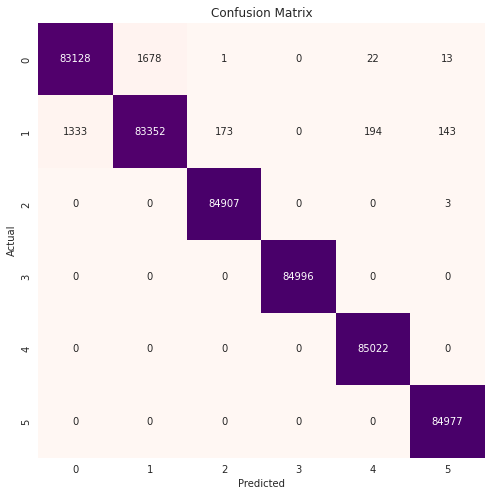

Classification Report

               precision    recall  f1-score   support

           1       0.98      0.98      0.98     84842
           2       0.98      0.98      0.98     85195
           3       1.00      1.00      1.00     84910
           4       1.00      1.00      1.00     84996
           5       1.00      1.00      1.00     85022
           6       1.00      1.00      1.00     84977

    accuracy                           0.99    509942
   macro avg       0.99      0.99      0.99    509942
weighted avg       0.99      0.99      0.99    509942



In [52]:
evaluate(model_overs_rf, "Oversampling", X_test, y_test)